In [17]:
import pandas as pd
from datas import *

year = 2018
list_assets, df_assets = get_hs300_stocks(f'{year}-01-01')
dfs= get_all_date_data(f'{year}-01-01', f'{year+1}-01-01', list_assets)


df_all = dfs[['date', 'asset', "close"]]
df_all['date'] = pd.to_datetime(df_all['date'])
# print(df_all)

close = df_all.pivot(index='date', columns='asset', values='close')
# close.index = pd.to_datetime(close.index)
print(close)

login success!
login respond error_code:0
login respond  error_msg:success
query_hs300 error_code:0
query_hs300  error_msg:success
logout success!
300
asset       000001  000002  000008  000060  000063  000069  000100  000157  \
date                                                                         
2018-01-02   13.70   32.56    8.77   11.28   35.73    8.90    3.91    4.55   
2018-01-03   13.33   32.33    8.75   11.21   36.69    8.95    3.99    4.53   
2018-01-04   13.25   33.12    8.68   11.35   36.90    9.04    3.96    4.51   
2018-01-05   13.30   34.76    8.55   11.31   36.04    9.52    3.92    4.57   
2018-01-08   12.96   35.99    8.47   11.55   35.57    9.49    3.88    4.66   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2018-12-24    9.42   23.88    3.96    4.04   20.26    5.94    2.40    3.67   
2018-12-25    9.34   23.97    3.97    3.97   20.36    5.89    2.41    3.61   
2018-12-26    9.30   23.80    3.98    3.94   19.86    6.09    2.40   

<ipython-input-17-ac9f773820f6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['date'] = pd.to_datetime(df_all['date'])


                     factor
date       asset           
2018-01-02 000001  0.348996
           000002 -1.138443
           000008 -0.207436
           000060 -2.402391
           000063 -2.683300
...                     ...
2018-12-28 603160 -1.934436
           603799 -0.599580
           603833  0.064911
           603858  0.016927
           603993  0.145945

[72657 rows x 1 columns]
Dropped 8.3% entries from factor data: 8.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-37.614211,0.167625,-1.841546,2.565128,13441,20.163819
2,-2.473767,0.450622,-0.257523,0.403960,13282,19.925291
3,-0.861699,1.048236,0.030461,0.273676,13293,19.941793
4,-0.356785,2.626910,0.339276,0.466419,13282,19.925291
5,-0.114147,54.135463,1.881461,2.531564,13361,20.043805


Returns Analysis


,1D,5D,10D
Ann. alpha,0.809,0.268,0.142
beta,0.048,0.067,-0.022
Mean Period Wise Return Top Quantile (bps),5.046,-7.895,-11.231
Mean Period Wise Return Bottom Quantile (bps),-32.867,-21.182,-19.914
Mean Period Wise Spread (bps),37.913,13.183,8.626


<Figure size 432x288 with 0 Axes>

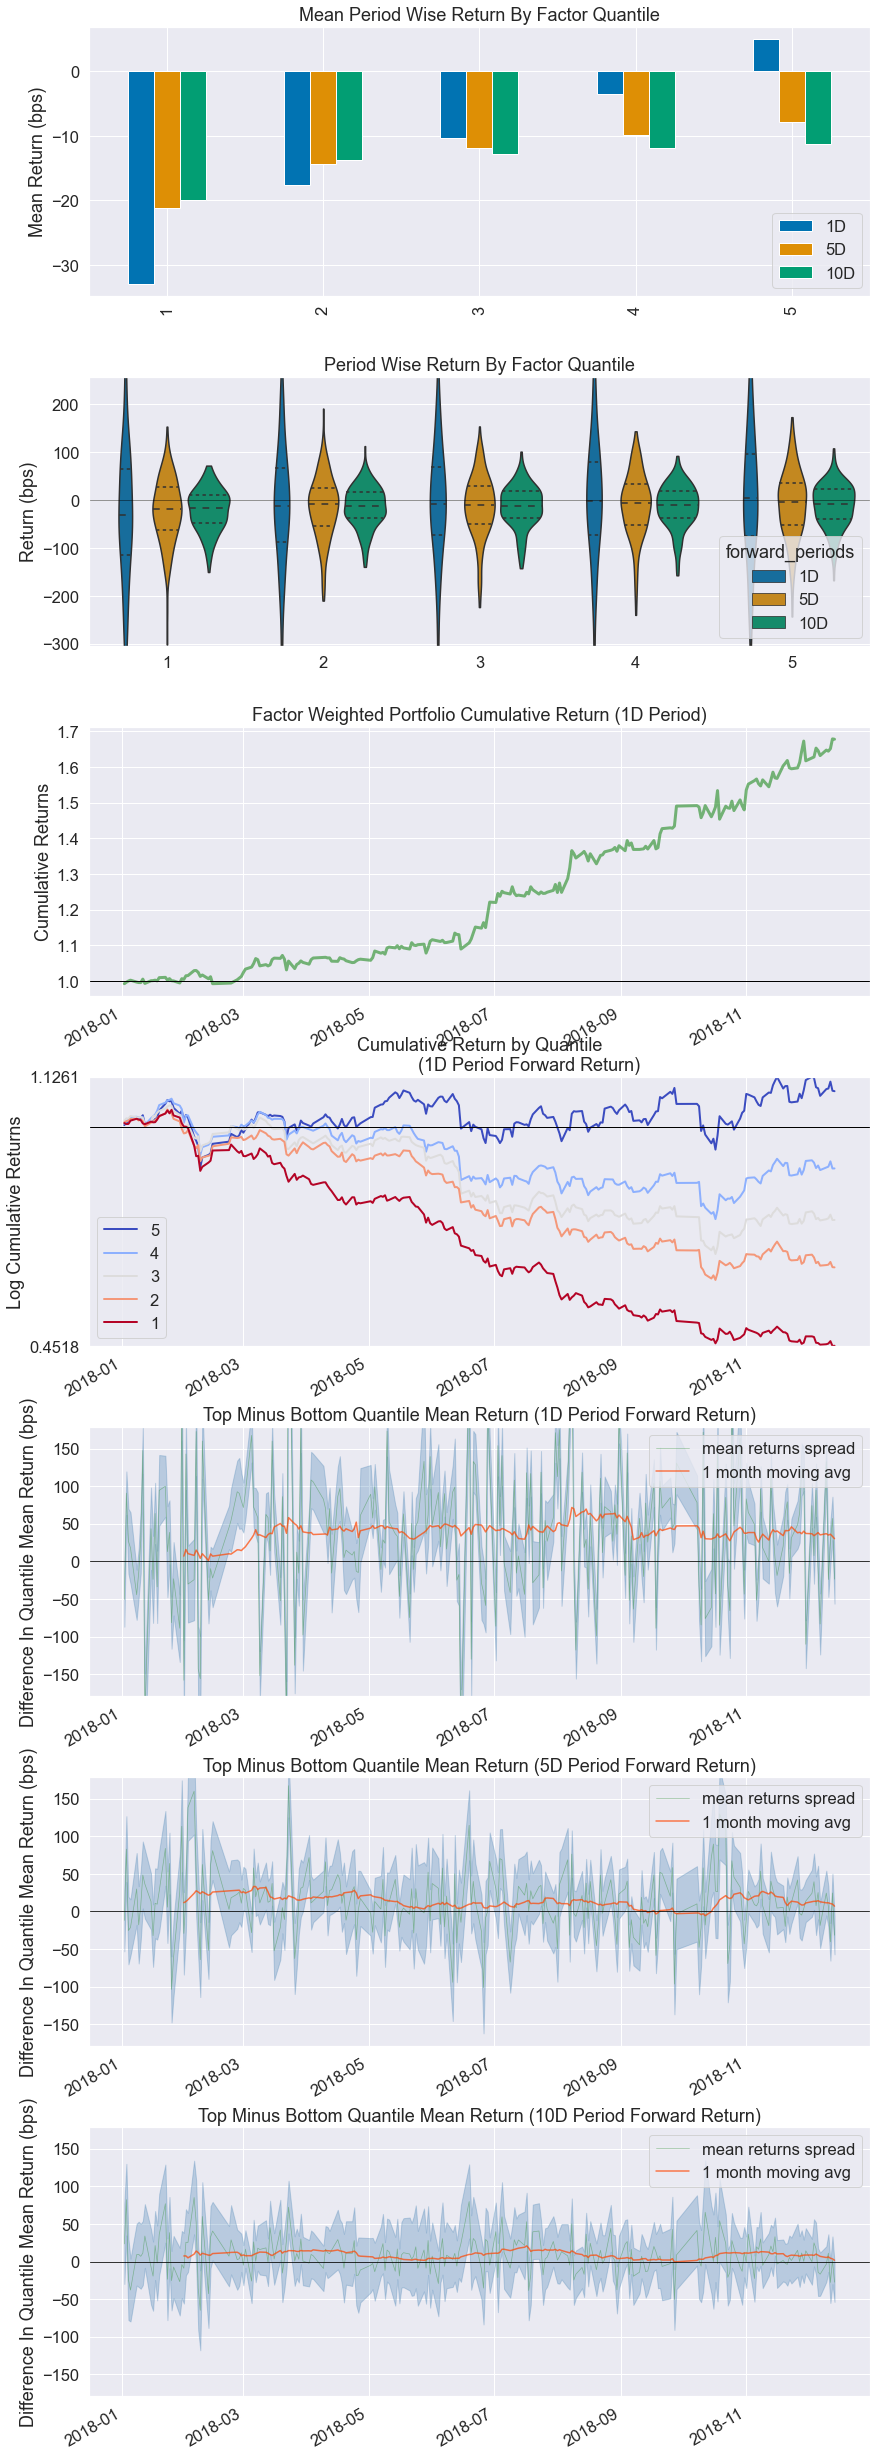

Information Analysis


,1D,5D,10D
IC Mean,0.101,0.055,0.044
IC Std.,0.166,0.157,0.128
Risk-Adjusted IC,0.605,0.347,0.343
t-stat(IC),9.231,5.304,5.233
p-value(IC),0.000,0.000,0.000
IC Skew,-0.055,0.049,0.018
IC Kurtosis,0.088,0.063,0.397


d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

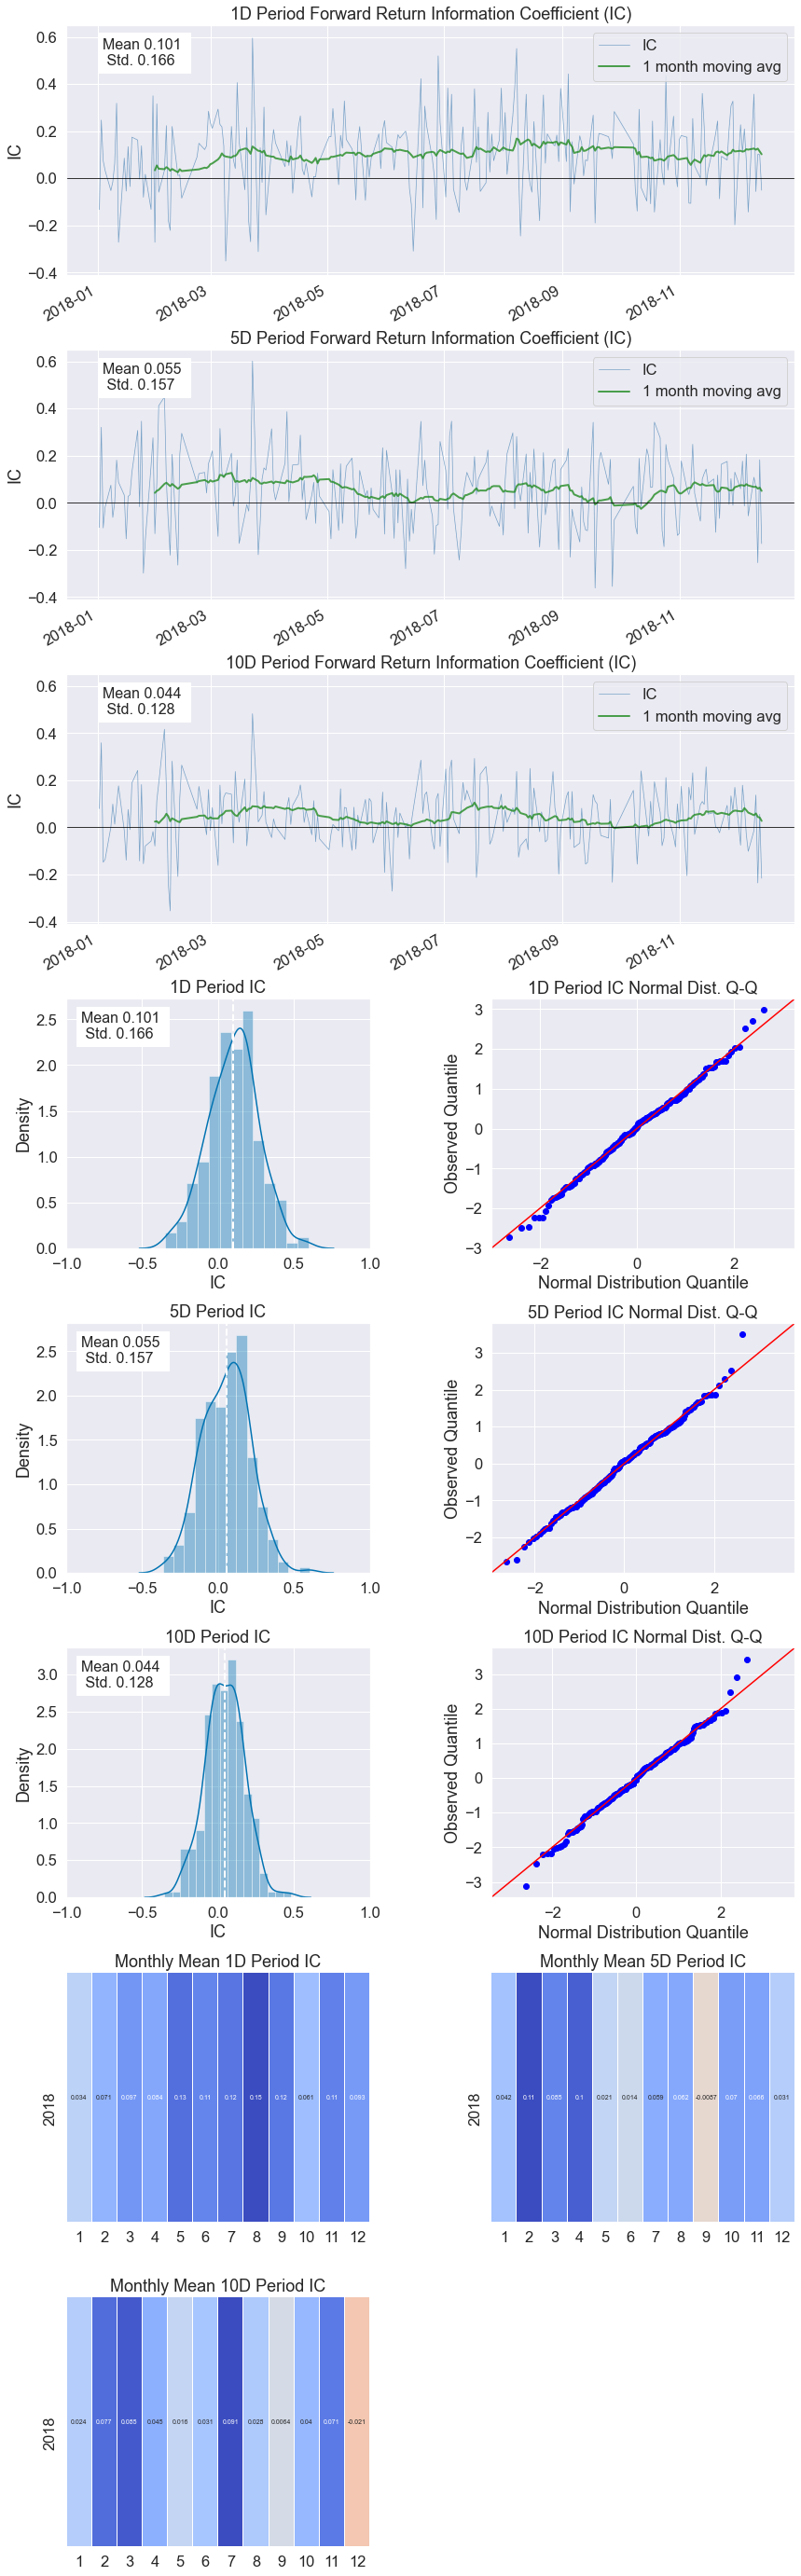

d:\code\StockProject\alphas\alphas\alphalens\utils.py:910: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.753,0.721,0.732
Quantile 2 Mean Turnover,0.787,0.779,0.771
Quantile 3 Mean Turnover,0.735,0.736,0.735
Quantile 4 Mean Turnover,0.788,0.771,0.769
Quantile 5 Mean Turnover,0.748,0.726,0.732


,1D,5D,10D
Mean Factor Rank Autocorrelation,-0.073,0.005,0.005


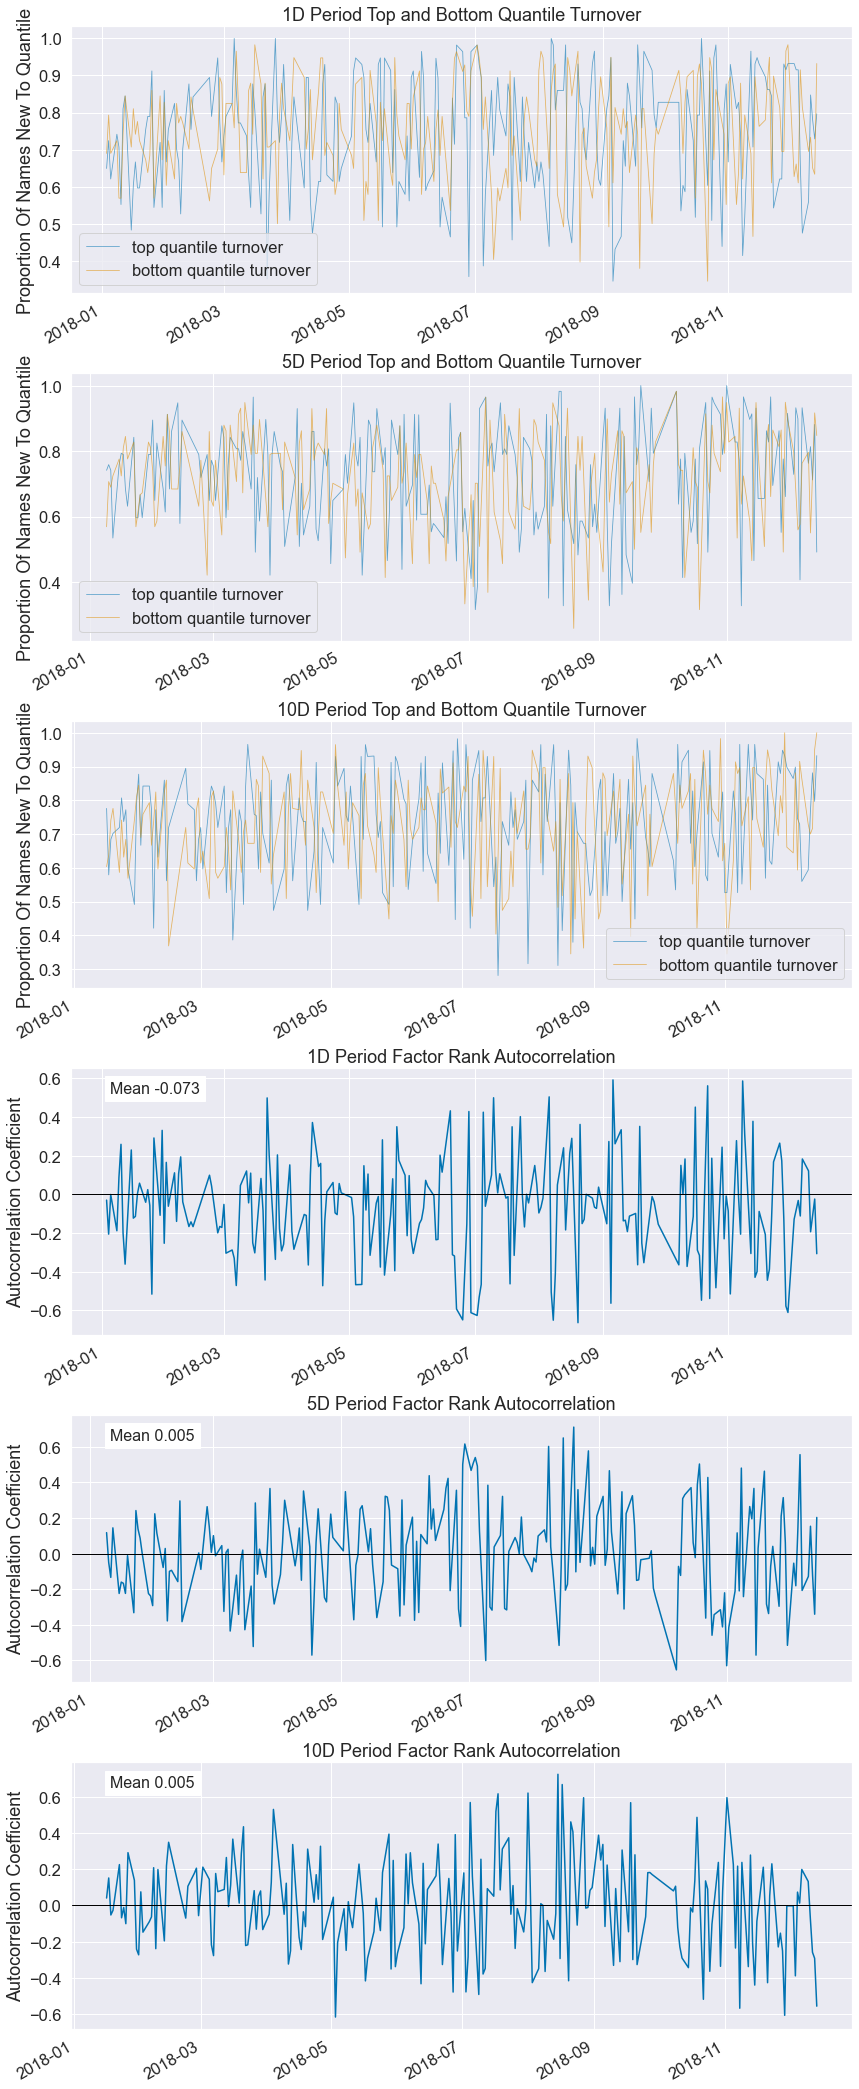

In [18]:
###########################简单现计算的因子#######################################
# alpha = dfs[['date', 'asset', "pctChg"]]
# alpha = alpha.rename(columns={
#         "pctChg": "factor"})
# alpha['date'] = pd.to_datetime(alpha['date'])
# alpha = alpha.set_index(['date', 'asset'], drop=True)
# alpha.sort_index(inplace=True)
# print(alpha)

############################已计算好存在文件中的因子######################################
alpha_num = 83
alpha_name = 'Alphas101'

# 读取已经计算好的因子
alpha = pd.read_csv('alphas/{}/{}/alpha{:03d}.csv'.format(alpha_name, year, alpha_num))

# 筛选出今年的数据，需与股票收盘日期区间一致
alpha = alpha[(alpha['date'] >= f'{year}-01-01') & (alpha['date'] <= f'{year+1}-01-01')]

# 因子矩阵转换为一维数据(alphalens需要的格式)
alpha = alpha.melt(id_vars=['date'], var_name='asset', value_name='factor' )

# date列转为日期格式
alpha['date'] = pd.to_datetime(alpha['date'])
alpha = alpha[['date', 'asset', 'factor']]

# 设置二级索引
alpha = alpha.set_index(['date', 'asset'], drop=True)
alpha.sort_index(inplace=True)
print(alpha)

#############################因子分析#######################################

from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.tears import create_full_tear_sheet

ret = get_clean_factor_and_forward_returns(alpha, close,quantiles=5)
create_full_tear_sheet(ret, long_short=False)